<a href="https://colab.research.google.com/github/FreddyR424/Deep_Learning/blob/master/Alffredi_Ramos_Facial_Emotion_Detection_Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

## **Milestone 1**

## **Problem Definition**

### **The context:** 
Deep Learning has found applications in many predictive tasks relating to more unstructured forms of data over the last few years, such as images, text, audio and video. Many of these tasks seem to be in the vein of a larger direction of predictive modeling that aims to match human-level
performance on such tasks, because humans have evolved to specialize in performing intelligent actions on such unstructured data. As a specific branch of AI (also called Affective Computing or Emotion AI) Artificial Emotional Intelligence stands for the study and development of technologies and computers that can read human emotions by means of analyzing body gestures, facial
expressions, voice tone, etc. and react appropriately to them. In the field of human-machine interaction, facial expression recognition is critical. From recent research, it has been found that as much as 55% of communication of sentiment takes place through facial expressions and other visual cues. Therefore, training a model to identify facial emotions accurately is an important step towards the development of emotionally intelligent
behavior in machines with AI capabilities. Automatic facial expression recognition systems could have many applications, including but not limited to any use case that requires human behavior understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses.<br>
_______________________________________________________________________________
### **The objectives:** 
The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion.<br>
_______________________________________________________________________________
### **The key questions:** 
Will our Convolutional Neural Network models accurately predict facial emotions based on the image?<br>
Will increasing parameters/weights achieve better model performance?<br>
_______________________________________________________________________________
### **The problem formulation:** 
For this project, we will be using data science to try to accurately recognize facial emotions based on the images provided. 
_______________________________________________________________________________

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

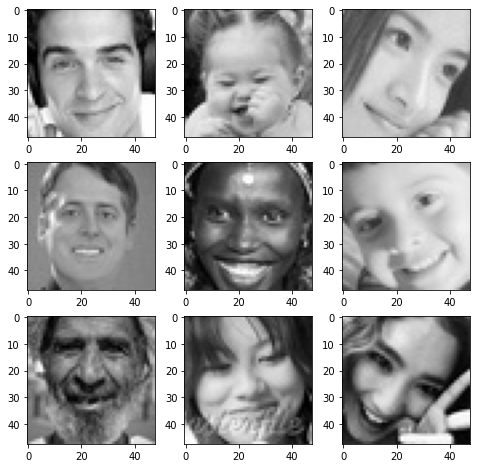

In [5]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
- The 9 images shown above in the 'happy' class show clear happiness facial expressions.

### **Sad**

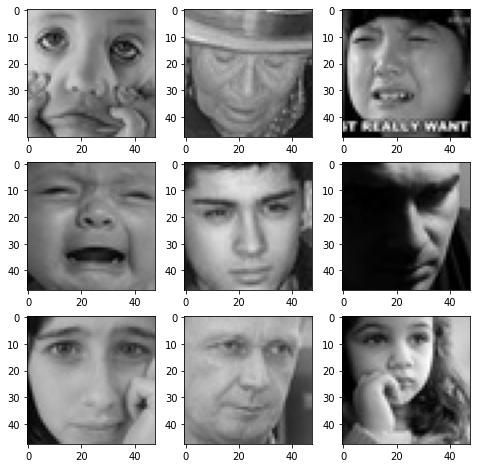

In [8]:
expression = 'sad'

plt.figure(figsize = (8, 8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)

  img = load_img(folder_path + "train/" + expression + "/" +
                 os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
  plt.imshow(img)

plt.show()

**Observations and Insights:**
- 3 of the 9 images shown above in the 'sad' class can be confused for a mad facial expression rather than sad. 

### **Neutral**

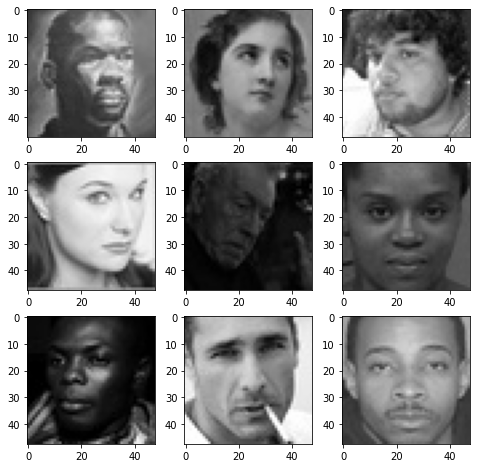

In [9]:
expression = 'neutral'

plt.figure(figsize = (8, 8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)

  img = load_img(folder_path + "train/" + expression + "/" +
                 os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
  plt.imshow(img)

plt.show()

**Observations and Insights:**
- The 9 images shown above for the 'neutral' class all show neutral facial expressions.
- However, some of the above images can be mistaken for 'sad' facial expressions.

### **Surprised**

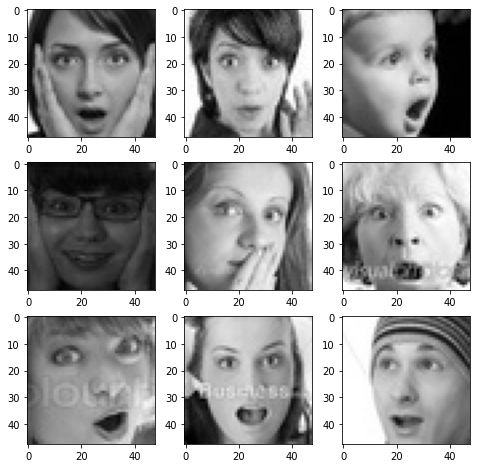

In [10]:
expression = 'surprise'

plt.figure(figsize = (8, 8))
for i in range(1, 10, 1):
  plt.subplot(3, 3, i)

  img = load_img(folder_path + "train/" + expression + "/" +
                 os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
  plt.imshow(img)

plt.show()

**Observations and Insights:**
- The 9 images shown above for the 'surprised' class all exhibit 'surprised' facial expressions.

## **Checking Distribution of Classes**

In [11]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':    ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':     3173


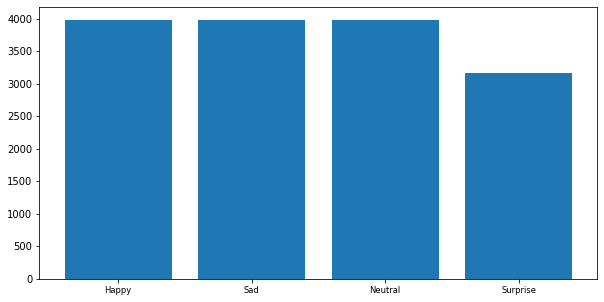

In [12]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:**
- For the most part, the classes are equally distributed except for a slight imbalance in the class 'surprise' which contains about 800 less images.
- This slight imbalance should not be a problem moving forward.
- I do not think any exploratory data analysis tasks would provide any meaningful insights.

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [14]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                        brightness_range=(0.,2.),
                                        rescale=1./255,
                                        shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                 target_size = (img_size, img_size),
                                                 color_mode = 'grayscale',
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range=(0.,2.),
                                  rescale=1./255,
                                  shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size, img_size),
                                            color_mode = 'grayscale',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? **CNNs are the right approach because CNNs are able to excel at making predictions on images.**
* What are the advantages of CNNs over ANNs and are they applicable here? **CNNs do this to a greater level than statistical Machine Learning techniques and Artificial Neural Networks (ANNs), because those algorithms flatten the spatial structure of an image right at the start, whereas CNNs only do so after applying a series of feature extraction steps on the image, such as Convolutions, Pooling, Padding, and non-linear Activation Functions.
Some of the reasons CNNs are advantageous over ANNs in making predictions on image data, are Spatial and Translational Invariance, the ability to extract important features and discard unimportant ones, and their relative computational efficiency over ANNs.**

### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [16]:
# Initializing a Sequential Model
model1 = Sequential()

# Add the first Convolutional block
model1.add(Conv2D(64, (2, 2), input_shape = (48, 48, 1), padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.2))

# Add the second Convolutional block
model1.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.2))

# Add the third Convolutional block
model1.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.2))

# Add the Flatten layer
model1.add(Flatten())

# Add the first Dense layer
model1.add(Dense(512, activation = 'relu'))
model1.add(Dropout(0.4))

# Add the Final layer
model1.add(Dense(4, activation = 'softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 32)       

### **Compiling and Training the Model**

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [18]:
# Write your code to compile your model1. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'. 
model1.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
# Write your code to fit your model1. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

history = model1.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
473/473 [==============================] - 77s 161ms/step - loss: 1.3804 - accuracy: 0.2720 - val_loss: 1.3591 - val_accuracy: 0.3303
Epoch 2/20
473/473 [==============================] - 75s 158ms/step - loss: 1.3034 - accuracy: 0.3784 - val_loss: 1.1946 - val_accuracy: 0.4692
Epoch 3/20
473/473 [==============================] - 76s 160ms/step - loss: 1.1989 - accuracy: 0.4608 - val_loss: 1.1252 - val_accuracy: 0.5260
Epoch 4/20
473/473 [==============================] - 79s 168ms/step - loss: 1.1400 - accuracy: 0.4949 - val_loss: 1.0587 - val_accuracy: 0.5523
Epoch 5/20
473/473 [==============================] - 79s 167ms/step - loss: 1.0986 - accuracy: 0.5129 - val_loss: 1.0441 - val_accuracy: 0.5622
Epoch 6/20
473/473 [==============================] - 77s 163ms/step - loss: 1.0693 - accuracy: 0.5332 - val_loss: 0.9895 - val_accuracy: 0.5879
Epoch 7/20
473/473 [==============================] - 75s 158ms/step - loss: 1.0440 - accuracy: 0.5434 - val_loss: 0.9507 - val_ac

### **Evaluating the Model on the Test Set**

In [20]:
test_images, test_labels = next(test_set)
accuracy = model1.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - loss: 0.7662 - accuracy: 0.6562 - 54ms/epoch - 54ms/step


**Observations and Insights:**
- Our base model shows a train accuracy of 66% and a validation accuracy of 67%.
- Adding more parameters/weights should improve accuracy.

### **Creating the second Convolutional Neural Network**

In the second Neural network, we will add a few more Convolutional blocks. We will also use Batch Normalization layers.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.
* Add first Conv2D layer with **256 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **32 filters**.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add the second Dense Layer with **128 neurons** and use **'relu' activation** function.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [22]:
# Creating sequential model
model2 = Sequential()
 
# Add the first Convolutional block
model2.add(Conv2D(256, (2, 2), padding = 'same', activation = 'relu', input_shape = (48, 48, 1)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

# Add the second Convolutional block
model2.add(Conv2D(128, (2, 2), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

# Add the third Convolutional block
model2.add(Conv2D(64, (2, 2), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

# Add the fourth Convolutional block
model2.add(Conv2D(256, (2, 2), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(2, 2))

# Add the Flatten layer
model2.add(Flatten())

# Adding the Dense layers
model2.add(Dense(512, activation = 'relu'))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(4, activation = 'softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 256)      1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_5 (Batc  (None, 24, 24, 128)     

### **Compiling and Training the Model**

**Hint:** Take reference from the code we used in the previous model for Compiling and Training the Model.

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [24]:
model2.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history = model2.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
473/473 [==============================] - 536s 1s/step - loss: 1.3212 - accuracy: 0.4084 - val_loss: 1.2715 - val_accuracy: 0.4043
Epoch 2/20
473/473 [==============================] - 508s 1s/step - loss: 1.0409 - accuracy: 0.5392 - val_loss: 1.1032 - val_accuracy: 0.5162
Epoch 3/20
473/473 [==============================] - 514s 1s/step - loss: 0.9298 - accuracy: 0.6027 - val_loss: 0.9496 - val_accuracy: 0.5933
Epoch 4/20
473/473 [==============================] - 499s 1s/step - loss: 0.8710 - accuracy: 0.6287 - val_loss: 0.9083 - val_accuracy: 0.5988
Epoch 5/20
473/473 [==============================] - 494s 1s/step - loss: 0.8221 - accuracy: 0.6557 - val_loss: 0.9225 - val_accuracy: 0.6022
Epoch 6/20
473/473 [==============================] - 468s 988ms/step - loss: 0.7761 - accuracy: 0.6778 - val_loss: 0.8812 - val_accuracy: 0.6229
Epoch 7/20
473/473 [==============================] - 469s 991ms/step - loss: 0.7552 - accuracy: 0.6818 - val_loss: 0.9352 - val_accuracy: 

### **Evaluating the Model on the Test Set**

In [26]:
test_images, test_labels = next(test_set)
accuracy = model2.evaluate(test_images, test_labels, verbose = 2)

1/1 - 0s - loss: 0.4801 - accuracy: 0.8438 - 209ms/epoch - 209ms/step


**Observations and Insights:**
- Train accuracy is 80%.
- Validation accuracy is 70%.
- Test accuracy is 84%.
- Overall good improvement from previous model. 

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons? **The first model did not have a satisfactory performnace. Possible reasons could be not enough parameters/weights.**
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white? **Grayscale showed overall better performance. the colormode 'rgb' is not needed since the photos are already black and white.**

### <u>**Proposed Approach**</u>

#### **Potential techniques:** 
- Try and acheive better performance by increasing the number of parameters/weights.
- Use Transfer Learning Architectures. 
_______________________________________________________________________________
#### **Overall solution design:** 
- Using Transfer Learning Architectures such as VGG16, ResNet v2, and Efficient Net.
_______________________________________________________________________________
#### **Measures of success:** 
- Which Transfer Learning Architecture performs best.
- If increasing the number of parameters/weights achieves better performance than previous CNN models.